In [70]:
# Importando as bibliotecas
import pandas as pd
import requests

#Extraindo
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Requisição para baixar os dados
response = requests.get(url)

# Convertendo os dados
data = response.json()

# Criando um DataFrame a partir dos dados JSON
df = pd.DataFrame(data)

print(df.head())



   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [71]:
# Transformando os dados JSON
dados_organizados = pd.json_normalize(data)

dados_organizados.head()




,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [72]:

linhas, colunas = dados_organizados.shape
print(f"A tabela tem {linhas} linhas e {colunas} colunas.")


A tabela tem 7267 linhas e 21 colunas.


In [73]:
# Mostrar os nomes das colunas
print(list(dados_organizados.columns))


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [74]:
print("Resumo do DataFrame:")

print(f"Número de linhas: {dados_organizados.shape[0]}")
print(f"Número de colunas: {dados_organizados.shape[1]}")

print("\nTipos de dados das colunas:")
print(dados_organizados.dtypes)

print("\nQuantidade de valores não nulos por coluna:")
print(dados_organizados.count())


Resumo do DataFrame:
Número de linhas: 7267
Número de colunas: 21

Tipos de dados das colunas:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Quantidade de valores não nulos por coluna:
customerID                   7267
Churn                        7267
c

In [75]:
# Quantos valores estão faltando em cada coluna
valores_faltando = dados_organizados.isnull().sum()

# Transformando o DataFrame para exibir como tabela
tabela_nulos = valores_faltando.reset_index()
tabela_nulos.columns = ['Coluna', 'Quantidade de valores nulos']

print("Quantidade de valores nulos em cada coluna:")

tabela_nulos



Quantidade de valores nulos em cada coluna:


,Coluna,Quantidade de valores nulos
0,customerID,0
1,Churn,0
2,customer.gender,0
3,customer.SeniorCitizen,0
4,customer.Partner,0
5,customer.Dependents,0
6,customer.tenure,0
7,phone.PhoneService,0
8,phone.MultipleLines,0
9,internet.InternetService,0


In [76]:

# Contar quantas linhas estão duplicadas no DataFrame
linhas_duplicadas = dados_organizados.duplicated().sum()

# Mostrar o resultado de forma clara
print(f"Total de linhas duplicadas na tabela: {linhas_duplicadas}")



Total de linhas duplicadas na tabela: 0


In [77]:
# resumo estatístico das colunas numéricas
resumo_estatistico = dados_organizados.describe()

resumo_estatistico


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [78]:
resumo_categorico = dados_organizados.describe(include='object')

# Resumo
print("Resumo estatístico das colunas categóricas:")
resumo_categorico


Resumo estatístico das colunas categóricas:


,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [79]:
print("Valores únicos nas colunas categóricas:\n")

colunas_categoricas = dados_organizados.select_dtypes(include='object').columns

# Coluna categórica mostrando os valores únicos
for coluna in colunas_categoricas:
    valores_unicos = dados_organizados[coluna].unique()
    print(f"Coluna: {coluna}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}\n")



Valores únicos nas colunas categóricas:

Coluna: customerID
Valores únicos (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
Valores únicos (3): ['No' 'Yes' '']

Coluna: customer.gender
Valores únicos (2): ['Female' 'Male']

Coluna: customer.Partner
Valores únicos (2): ['Yes' 'No']

Coluna: customer.Dependents
Valores únicos (2): ['Yes' 'No']

Coluna: phone.PhoneService
Valores únicos (2): ['Yes' 'No']

Coluna: phone.MultipleLines
Valores únicos (3): ['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
Valores únicos (3): ['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
Valores únicos (3): ['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup
Valores únicos (3): ['Yes' 'No' 'No internet service']

Coluna: internet.DeviceProtection
Valores únicos (3): ['No' 'Yes' 'No internet service']

Coluna: internet.TechSupport
Valores únicos (3): ['Yes' 'No' 'No internet service']

Coluna: internet.Streami

In [80]:
# Criando uma cópia do DataFrame original para evitar alterações acidentais
df_copy = dados_organizados.copy()

# Mostrar mensagem para confirmar que a cópia foi criada
print("Cópia do DataFrame criada com sucesso!")


Cópia do DataFrame criada com sucesso!


In [81]:
df_copy['account.Charges.Total'] = pd.to_numeric(df_copy['account.Charges.Total'], errors='coerce')

In [82]:
print("O tipo dos dados na coluna 'account.Charges.Total' é:", df_copy['account.Charges.Total'].dtype)

O tipo dos dados na coluna 'account.Charges.Total' é: float64


In [83]:
valores_nulos = df_copy[df_copy['account.Charges.Total'].isna()]
if valores_nulos.empty:

    print("✅ Não há valores nulos na coluna 'account.Charges.Total'.")
else:
    print(f"⚠️ Foram encontrados {len(valores_nulos)} valores nulos na coluna 'account.Charges.Total':\n")
    print(valores_nulos.to_string(index=True))  # mostra tabela com índices

⚠️ Foram encontrados 11 valores nulos na coluna 'account.Charges.Total':

      customerID Churn customer.gender  customer.SeniorCitizen customer.Partner customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines internet.InternetService internet.OnlineSecurity internet.OnlineBackup internet.DeviceProtection internet.TechSupport internet.StreamingTV internet.StreamingMovies account.Contract account.PaperlessBilling      account.PaymentMethod  account.Charges.Monthly  account.Charges.Total
975   1371-DWPAZ    No          Female                       0              Yes                 Yes                0                 No    No phone service                      DSL                     Yes                   Yes                       Yes                  Yes                  Yes                       No         Two year                       No    Credit card (automatic)                    56.05                    NaN
1775  2520-SGTTA    No          Female              

In [84]:
# Para cada linha, se 'customer.tenure' for 0, então coloca 0.0 em 'account.Charges.Total' nessa linha
for i in range(len(df_copy)):
  if df_copy.loc[i, 'customer.tenure'] == 0:
    df_copy.loc[i, 'account.Charges.Total'] = 0

In [85]:
# Valores nulos
print("Quantidade de valores nulos:", df_copy['account.Charges.Total'].isna().sum())

Quantidade de valores nulos: 0


In [86]:
# Quantidade de registros vazios
print("Quantidade de registros vazios em 'Churn':", (df_copy['Churn'] == '').sum())

Quantidade de registros vazios em 'Churn': 224


In [87]:
# Registros com valores vazios
print("Registros com valor vazio na coluna 'Churn':")
df_copy[df_copy['Churn'] == '']

Registros com valor vazio na coluna 'Churn':


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [88]:
# Registros 'Churn' que está vazio
print("Descrição dos registros onde 'Churn' está vazio:")
df_copy[df_copy['Churn'] == ''].describe(include='all')

Descrição dos registros onde 'Churn' está vazio:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,224,224,224,224.000000,224,224,224.000000,224,224,224,...,224,224,224,224,224,224,224,224,224.000000,224.000000
unique,224,1,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,0047-ZHDTW,,Male,NaN,Yes,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,224,120,NaN,116,153,NaN,199,105,102,...,94,100,109,86,85,130,140,80,NaN,NaN
mean,NaN,NaN,NaN,0.178571,NaN,NaN,31.571429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.412277,2196.933705
std,NaN,NaN,NaN,0.383851,NaN,NaN,24.998552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.388712,2329.961954
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750000,18.900000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.425000,351.037500
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.100000,1163.175000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.412500,3562.862500


In [89]:
# # Calculando a proporção dos valores
proporcao = df_copy['Churn'].value_counts(normalize=True) * 100
proporcao = proporcao.round(2)

print("Porcentagem dos valores na coluna 'Churn':")
proporcao

Porcentagem dos valores na coluna 'Churn':


,proportion
Churn,
No,71.20
Yes,25.72
,3.08


In [150]:
df_churn_limpos = df_copy[df_copy['Churn'] != ''].copy()

# 2. Dataset com todos os registros, preenchendo vazios com 'Unknown'
df_churn_unknown = df_copy.copy()
df_churn_unknown['Churn'] = df_churn_unknown['Churn'].replace('', 'Unknown')

In [151]:
df_churn_limpos.shape


(7043, 22)

In [152]:
print(f"Dataset limpo: {df_churn_limpos.shape}")
print(df_churn_limpos['Churn'].value_counts())

print("\nDataset com 'Unknown':")
print(df_churn_unknown['Churn'].value_counts())

Dataset limpo: (7043, 22)
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Dataset com 'Unknown':
Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64


In [154]:
binarias = [col for col in df_churn_limpos.columns
            if sorted(df_churn_limpos[col].unique()) == ['No', 'Yes']]
print(binarias)

['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']


In [155]:
df_churn_limpos[binarias] = df_churn_limpos[binarias].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1486415403.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn_limpos[binarias] = df_churn_limpos[binarias].replace({'Yes': 1, 'No': 0})


In [156]:
df_churn_limpos[binarias].head()

,Churn,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1


In [157]:
# Coluna 'Daily_Charges'
df_copy['Daily_Charges'] = df_copy['account.Charges.Monthly'] / 30.42

In [158]:
df_copy['Daily_Charges'].dtype

dtype('float64')

In [159]:
df_silver = df_copy.copy()

In [160]:
df_silver.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.127551
std,0.369074,24.571773,30.129572,2268.648587,0.990453
min,0.000000,0.000000,18.250000,0.000000,0.599934
25%,0.000000,9.000000,35.425000,396.200000,1.164530
50%,0.000000,29.000000,70.300000,1389.200000,2.310980
75%,0.000000,55.000000,89.875000,3778.525000,2.954471
max,1.000000,72.000000,118.750000,8684.800000,3.903682


In [161]:

sns.set(style='whitegrid')
custom_palette = 'BuGn'  # tons de azul-verde
# Exibir gráficos com tamanho padrão
plt.rcParams['figure.figsize'] = (8, 4)

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


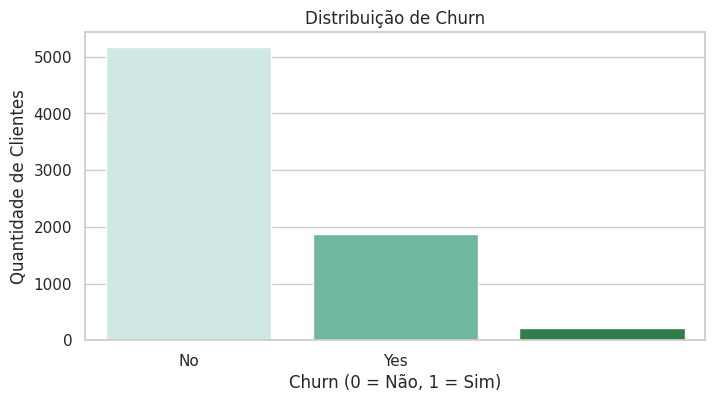

In [162]:
print(df_silver['Churn'].value_counts(normalize=True))
# Gráfico
sns.countplot(data=df_silver, x='Churn', hue='Churn', palette=custom_palette, legend=False)

plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()

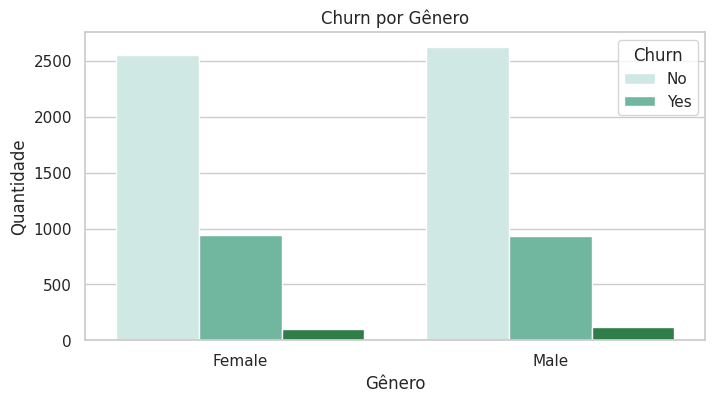

In [163]:
# Gêneros
sns.countplot(data=df_silver, x='customer.gender', hue='Churn', palette=custom_palette)
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

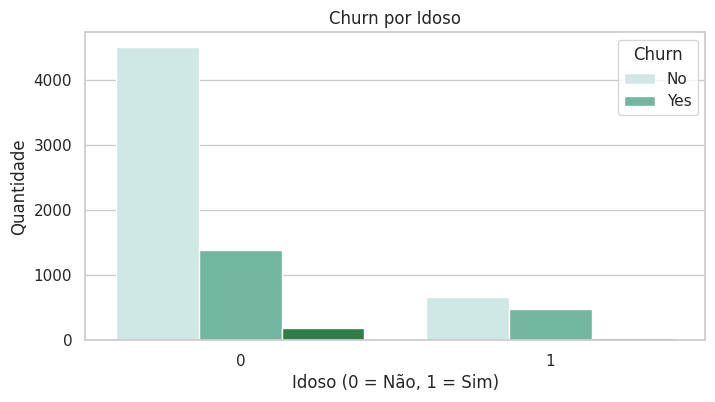

In [164]:
# Idoso
sns.countplot(data=df_silver, x='customer.SeniorCitizen', hue='Churn', palette=custom_palette)
plt.title('Churn por Idoso')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

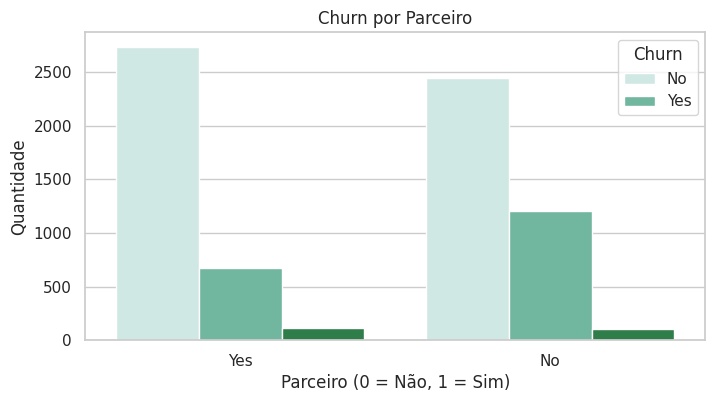

In [165]:
# Parceiros
sns.countplot(data=df_silver, x='customer.Partner', hue='Churn', palette=custom_palette)
plt.title('Churn por Parceiro')
plt.xlabel('Parceiro (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

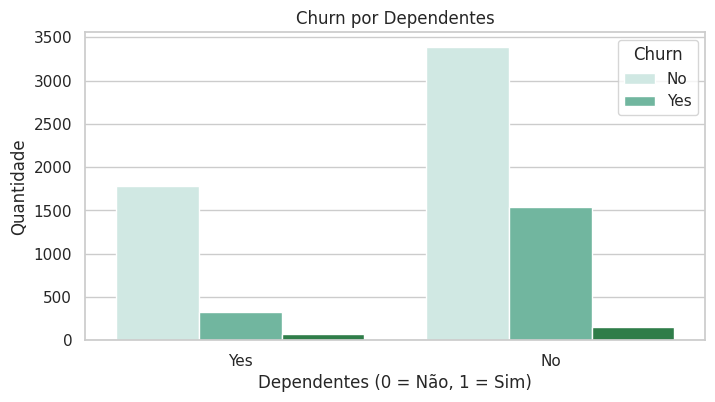

In [166]:
# Dependentes
sns.countplot(data=df_silver, x='customer.Dependents', hue='Churn', palette=custom_palette)
plt.title('Churn por Dependentes')
plt.xlabel('Dependentes (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

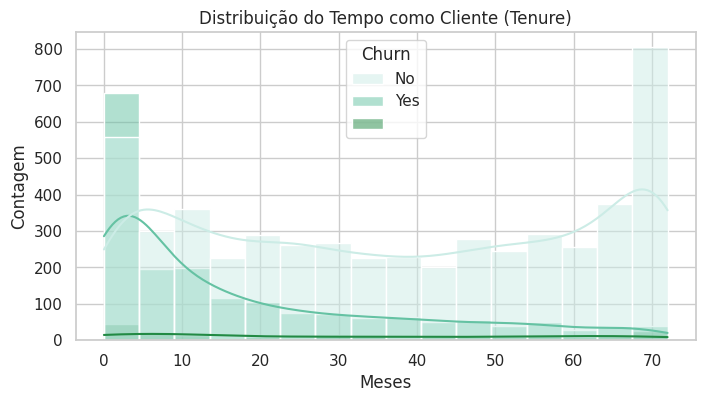

In [167]:
# Dristribuição do Tempo cliente
sns.histplot(data=df_silver, x='customer.tenure', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição do Tempo como Cliente (Tenure)')
plt.xlabel('Meses')
plt.ylabel('Contagem')
plt.show()

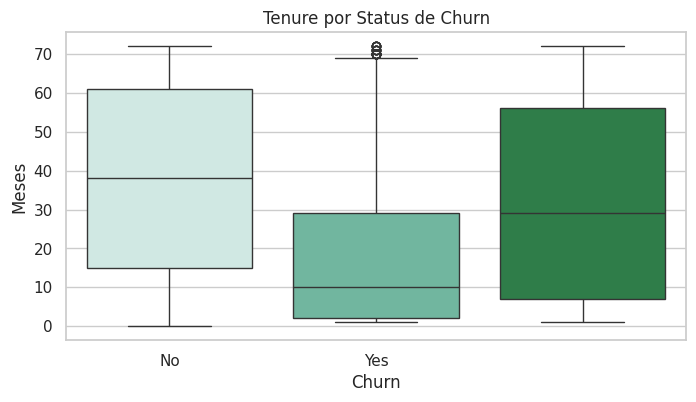

In [170]:
# Status "Churn"
sns.boxplot(data=df_silver, x='Churn', y='customer.tenure', hue='Churn', palette=custom_palette)
plt.title('Tenure por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Meses')
plt.show()


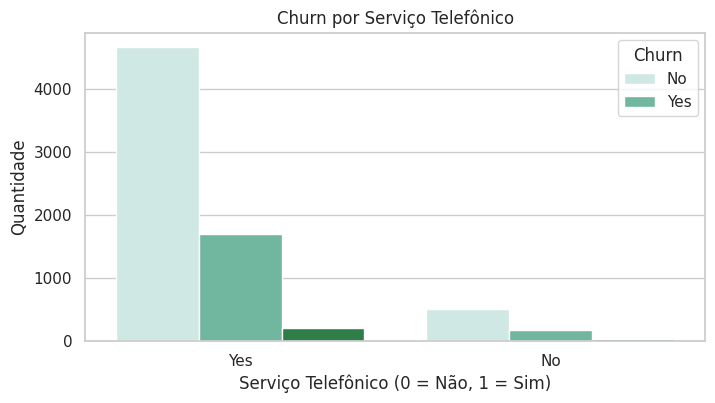

In [171]:
# Serviço telefônico
sns.countplot(data=df_silver, x='phone.PhoneService', hue='Churn', palette=custom_palette)
plt.title('Churn por Serviço Telefônico')
plt.xlabel('Serviço Telefônico (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

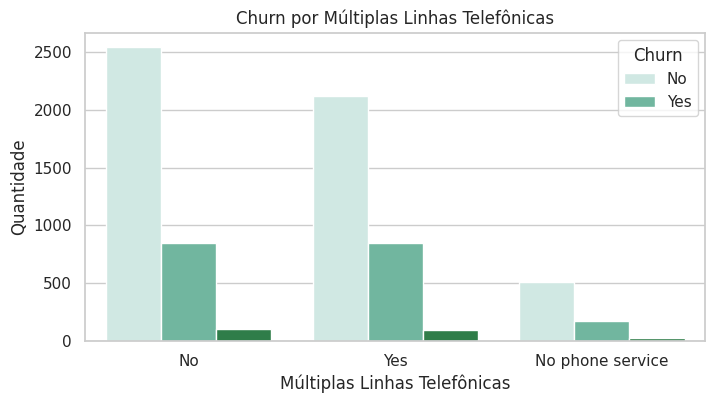

In [172]:
# Varias linhas telefônicas
sns.countplot(data=df_silver, x='phone.MultipleLines', hue='Churn', palette=custom_palette)
plt.title('Churn por Múltiplas Linhas Telefônicas')
plt.xlabel('Múltiplas Linhas Telefônicas')
plt.ylabel('Quantidade')
plt.show()

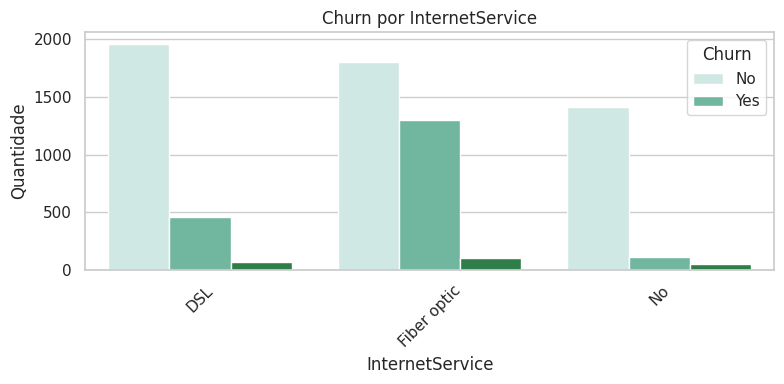

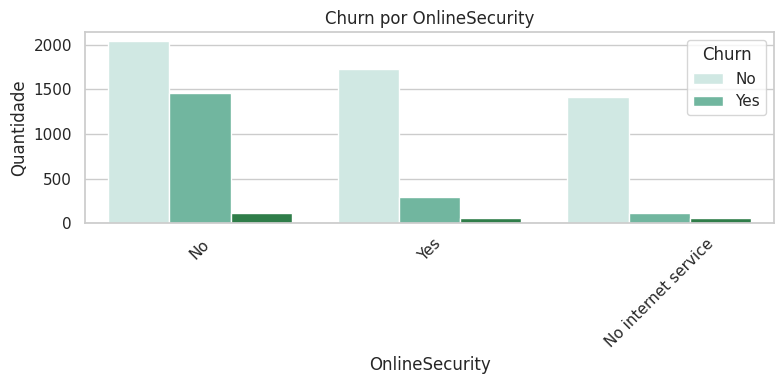

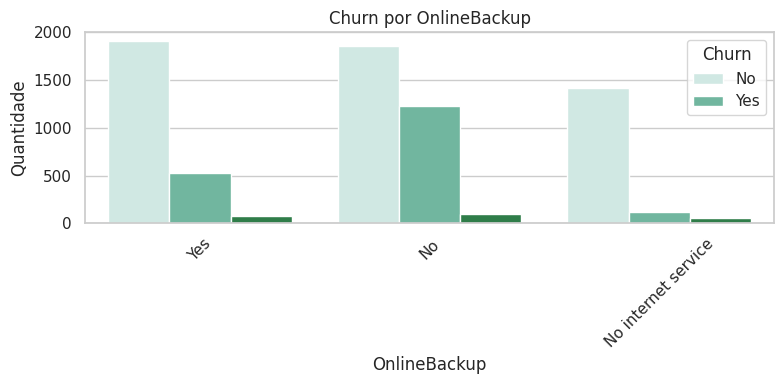

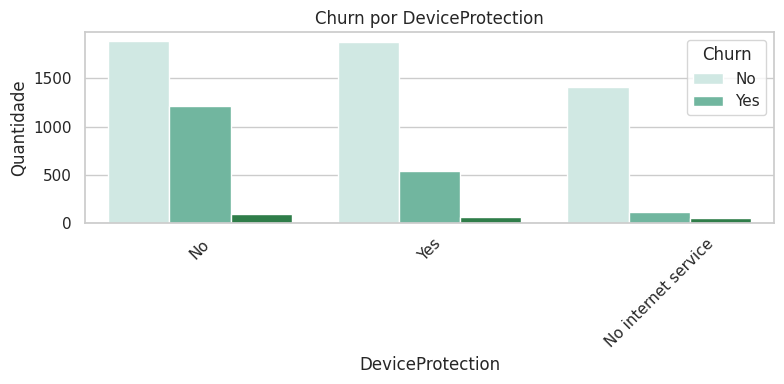

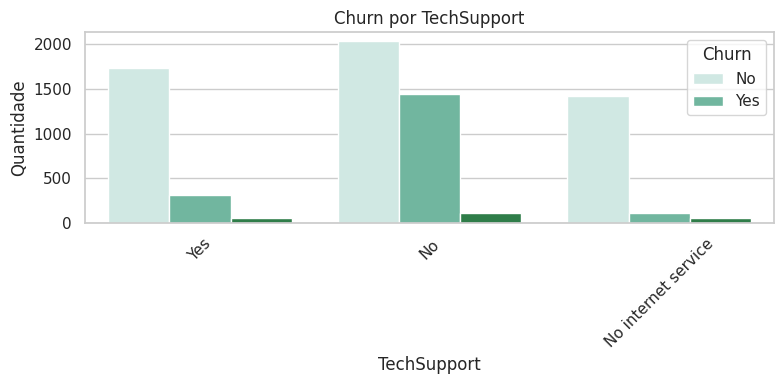

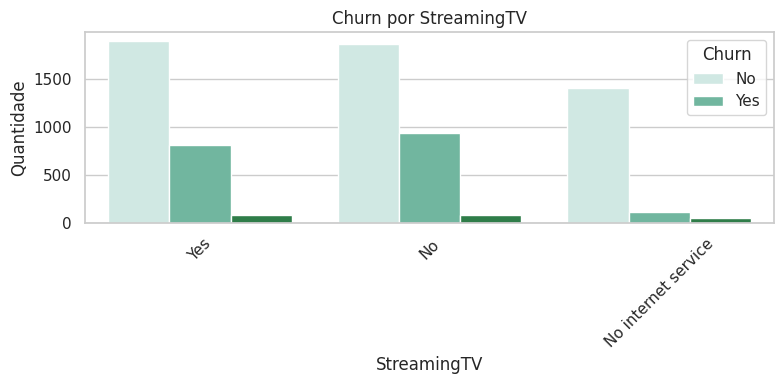

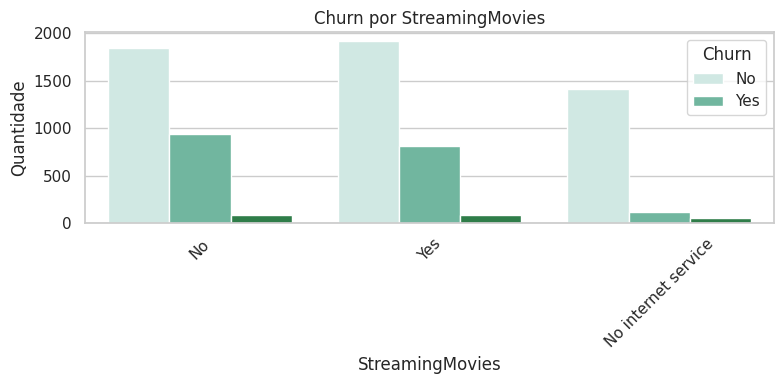

In [173]:
# Serviço de internet
features = [
    'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies'
]

for feature in features:
    sns.countplot(data=df_silver, x=feature, hue='Churn', palette=custom_palette)
    plt.title(f'Churn por {feature.split(".")[1]}')
    plt.xlabel(feature.split(".")[1])
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


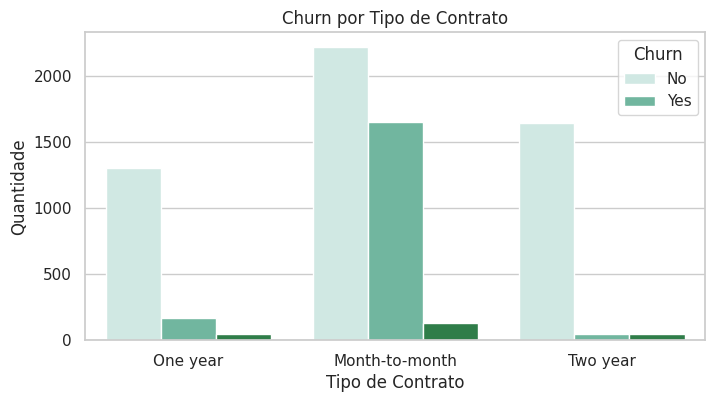

In [174]:
# Contrato de pagamento
sns.countplot(data=df_silver, x='account.Contract', hue='Churn', palette=custom_palette)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.show()

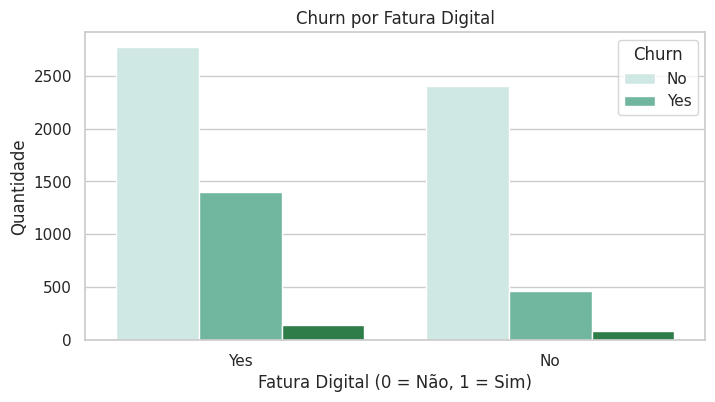

In [175]:
# Fatura digital
sns.countplot(data=df_silver, x='account.PaperlessBilling', hue='Churn', palette=custom_palette)
plt.title('Churn por Fatura Digital')
plt.xlabel('Fatura Digital (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

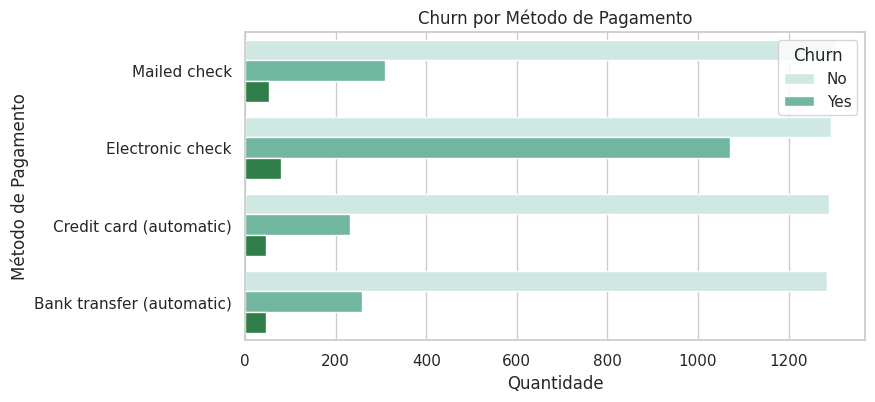

In [176]:
# Método de pagamento
sns.countplot(data=df_silver, y='account.PaymentMethod', hue='Churn', palette=custom_palette)
plt.title('Churn por Método de Pagamento')
plt.xlabel('Quantidade')
plt.ylabel('Método de Pagamento')
plt.show()

In [177]:
df_silver.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

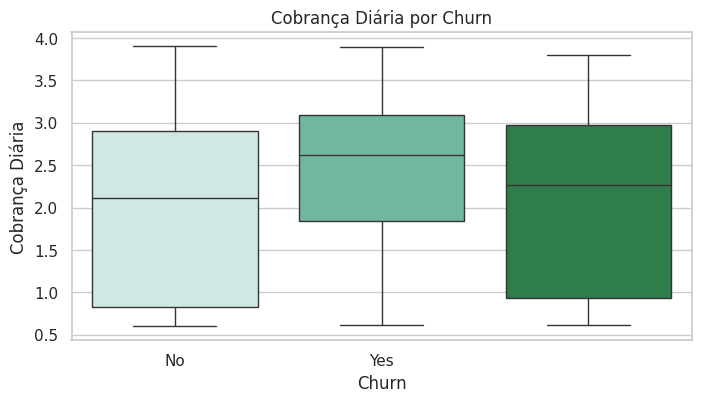

In [178]:
sns.boxplot(data=df_silver, x='Churn', y='Daily_Charges',  hue='Churn', palette=custom_palette)
plt.title('Cobrança Diária por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Diária')
plt.show()

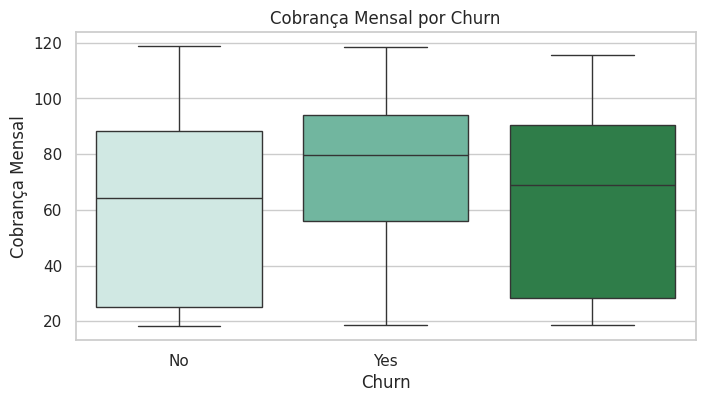

In [179]:
# Cobrança mensalmente
sns.boxplot(data=df_silver, x='Churn', y='account.Charges.Monthly', hue='Churn', palette=custom_palette)
plt.title('Cobrança Mensal por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal')
plt.show()

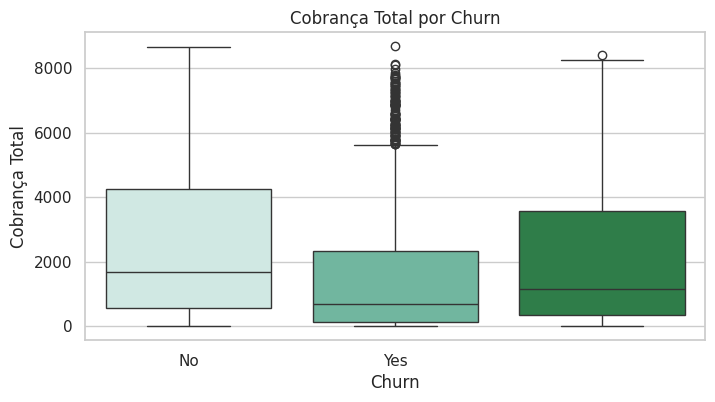

In [180]:
# Cobrança total
sns.boxplot(data=df_silver, x='Churn', y='account.Charges.Total', hue='Churn', palette=custom_palette)
plt.title('Cobrança Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Total')
plt.show()

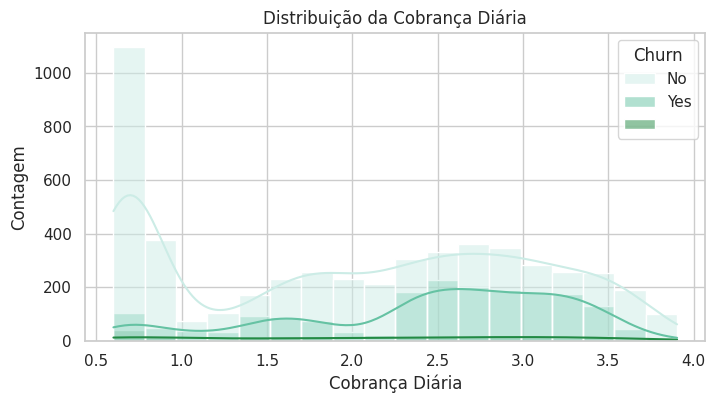

In [181]:
# Distribuição de cobrança diária
sns.histplot(data=df_silver, x='Daily_Charges', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Diária')
plt.xlabel('Cobrança Diária')
plt.ylabel('Contagem')
plt.show()

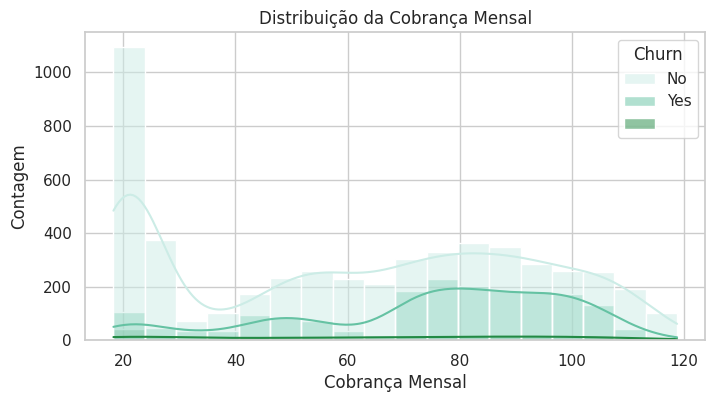

In [182]:
sns.histplot(data=df_silver, x='account.Charges.Monthly', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Mensal')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Contagem')
plt.show()

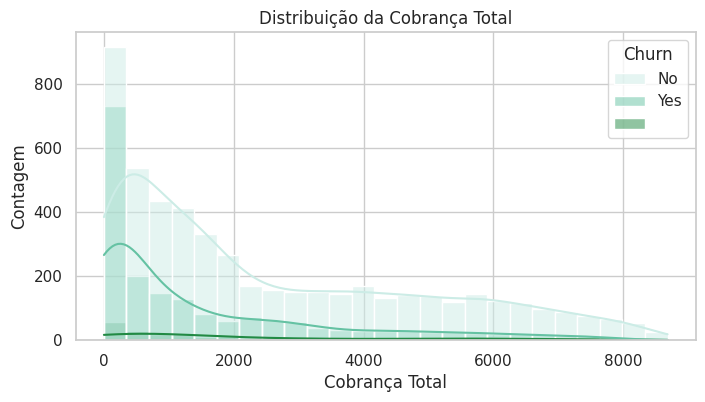

In [183]:
sns.histplot(data=df_silver, x='account.Charges.Total', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Total')
plt.xlabel('Cobrança Total')
plt.ylabel('Contagem')
plt.show()

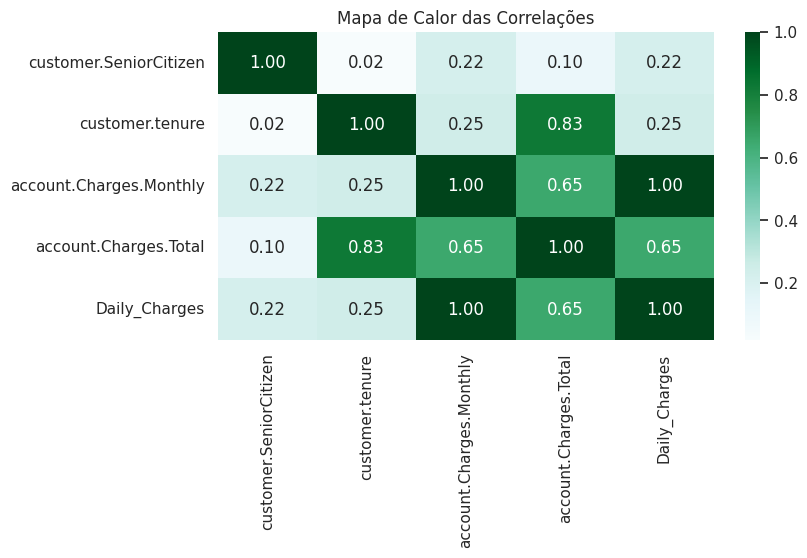

In [185]:
# Correlações
corr = df_silver.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()


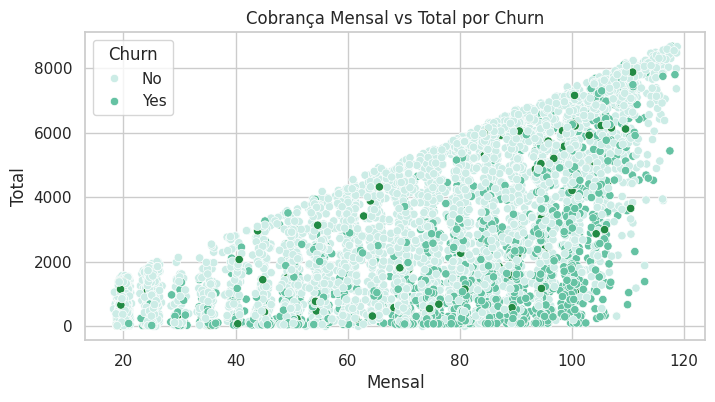

In [187]:
# Gráficos de Dispersão
sns.scatterplot(data=df_silver,x='account.Charges.Monthly',y='account.Charges.Total',hue='Churn',palette=custom_palette)
plt.title('Cobrança Mensal vs Total por Churn')
plt.xlabel('Mensal')
plt.ylabel('Total')
plt.show()
